# 📊 Titanic Survival Analysis :  Exploratory Data Analysis

## 1️⃣ Project Setup

In [1]:
# Core libraries 
import pandas as pd 
import numpy as np

# Visualization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### This cell sets up all required libraries and visualization styles used throughout the analysis.

## 2️⃣ Load Dataset

In [2]:
# Load Titanic dataset form seaborn 
df=sns.load_dataset('titanic')
# Preview dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Displays the first five rows to understand the structure and columns of the dataset.

In [3]:
# Dataset shape
df.shape

(891, 15)

#### Shows total rows and columns, confirming dataset size before analysis.

In [5]:
# Dataset structure and datatypes 
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


#### Provides data types and highlights missing values in key columns.

# 3️⃣ Initial Observations

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### - Dataset contains passenger demographics, ticket details, and survival status  
### - Missing values present in age, embarked, and deck  
### - Survival column is binary (0 = No, 1 = Yes) 


# 4️⃣ Missing Value Analysis

In [6]:
# Checking missing values 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Counts missing values in each column to decide cleaning strategy.

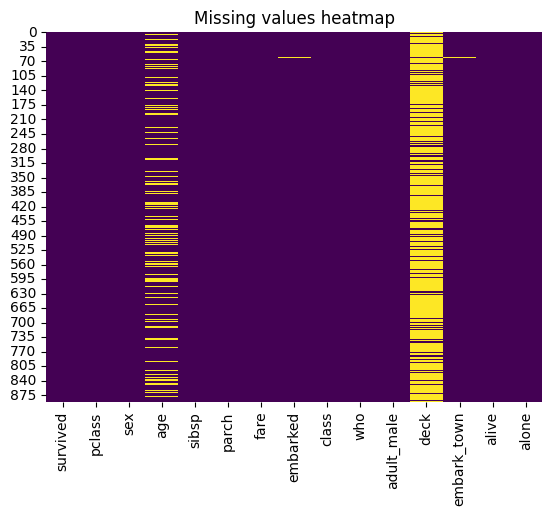

In [7]:
# Visualize missing values 
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")
plt.title("Missing values heatmap")
plt.show()

#### Visual representation of missing values to quickly identify problematic columns.

# 5️⃣ Data Cleaning & Preprocessing

In [10]:
# Fill the age columns missing values with median 
df['age'].fillna(df['age'].median(), inplace=True)

/tmp/ipykernel_21810/1077405080.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['age'].fillna(df['age'].median(), inplace=True)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

#### Replaces missing age values with the median to avoid skewing the data.

In [12]:
# Fill missing embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


/tmp/ipykernel_21810/2292764944.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: str

#### Uses the most frequent embarkation point to fill missing categorical data.

In [ ]:
#  Drop deck column
df.drop(columns='deck',inplace=True)

#### Removes a column with excessive missing values to maintain data quality.

In [13]:
# Convert categorical columns
categorical_col=['sex','class','embarked','who','adult_male','alone']
for col in categorical_col:
    df['col']=df[col].astype('category')


#### Converts categorical variables to optimize memory usage and improve clarity.

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    str     
 12  alive        891 non-null    str     
 13  alone        891 non-null    bool    
 14  col          891 non-null    category
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.3 KB


#### Verifies that missing values are handled and data types are correctly assigned.

# 6️⃣ Univariate Analysis

## Bar Plot

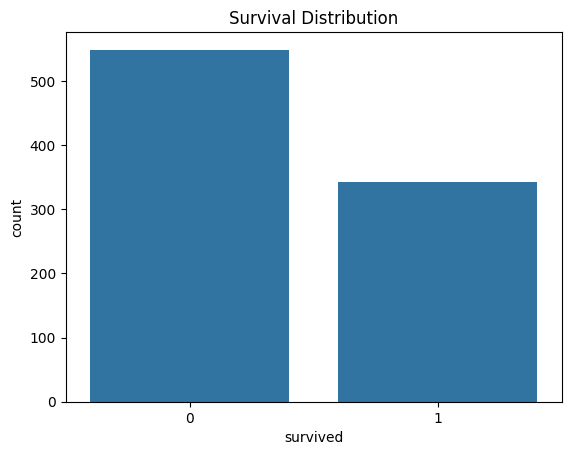

In [15]:
sns.countplot(data=df,x='survived')
plt.title("Survival Distribution")
plt.show()

#### Shows imbalance between survivors and non-survivors.

## Histogram

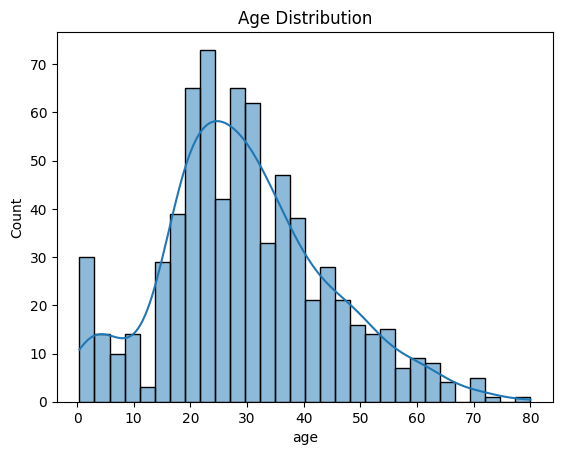

In [18]:
sns.histplot(df['age'],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

#### Illustrates that most passengers were young to middle-aged adults.

## Count Plot

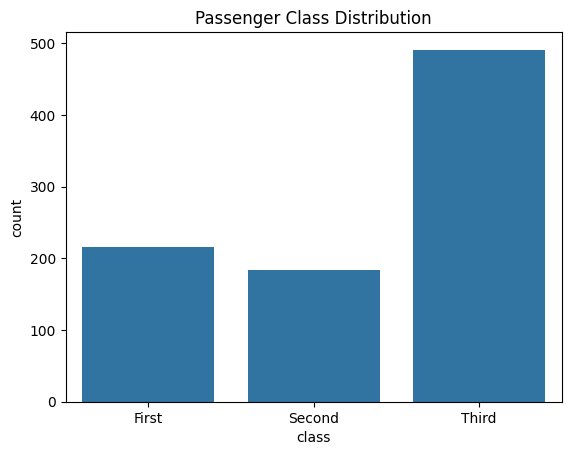

In [19]:
sns.countplot(data=df,x='class')
plt.title("Passenger Class Distribution")
plt.show()

#### Reveals that third-class passengers dominate the dataset.

# 7️⃣ Bivariate Analysis

## Count Plot 

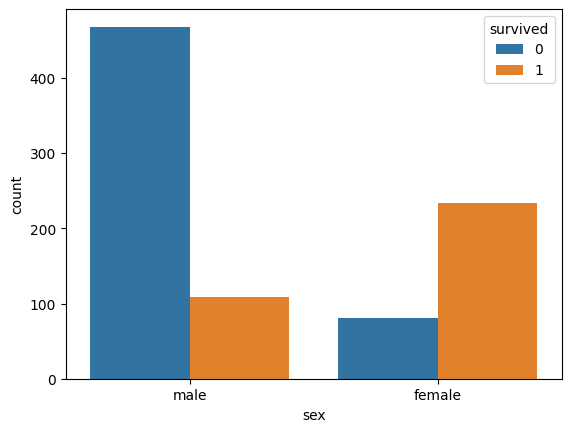

In [23]:
sns.countplot(x='sex',hue='survived',data=df)
plt.show("Survival By Gender")
plt.show()

#### Shows that female passengers had significantly higher survival rates.

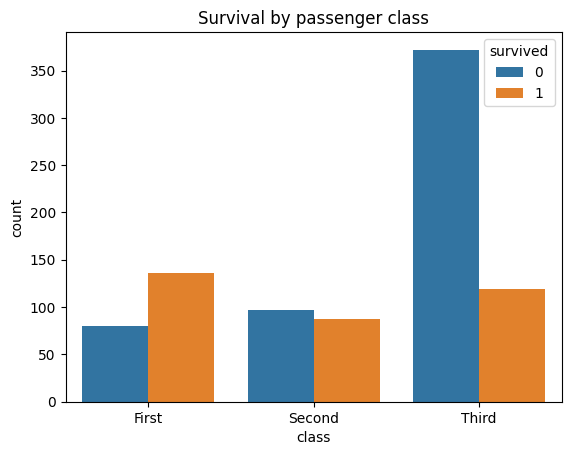

In [24]:
sns.countplot(x='class',hue='survived',data=df)
plt.title("Survival by passenger class")
plt.show()

#### Indicates that first-class passengers were more likely to survive.

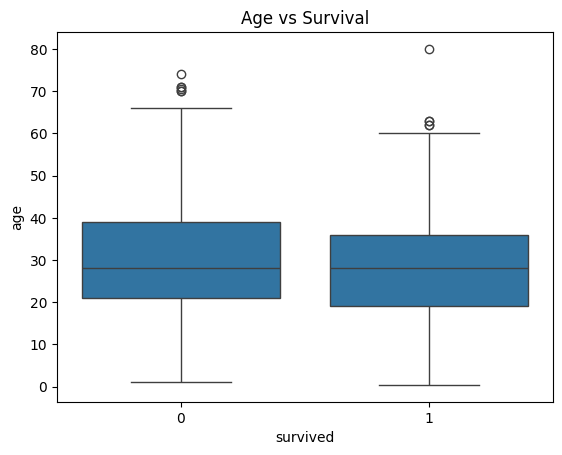

In [25]:
sns.boxplot(data=df,x='survived',y='age')
plt.title("Age vs Survival")
plt.show()

#### Highlights that younger passengers had better survival outcomes.

# 8️⃣ Multivariate Analysis

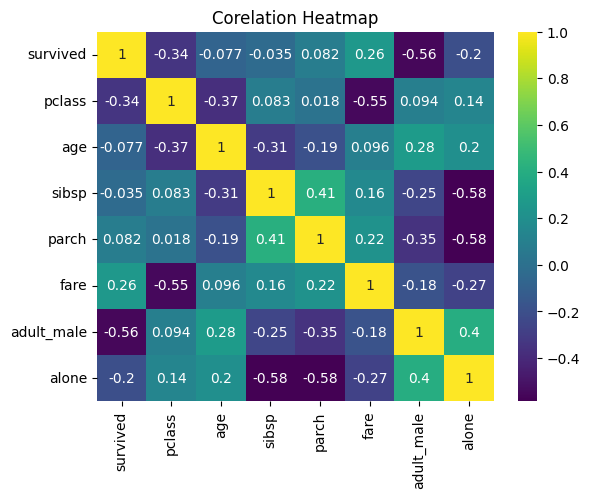

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Corelation Heatmap")
plt.show()

#### Shows that fare positively correlates with survival while passenger class correlates negatively.

Fare vs Survival → positive correlation

Passengers who paid more were more likely to survive.

Passenger Class vs Survival → negative correlation

Lower class (higher numeric value for class) → lower chance of survival.

So basically, the heatmap is a visual snapshot of how numerical features in your dataset are related to each other.

# 9️⃣ Feature Engineering

In [32]:
df['family_size']=df['sibsp']+df['parch']+1


In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,col,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,True,1


#### Creates a new feature to analyze the impact of family presence on survival.

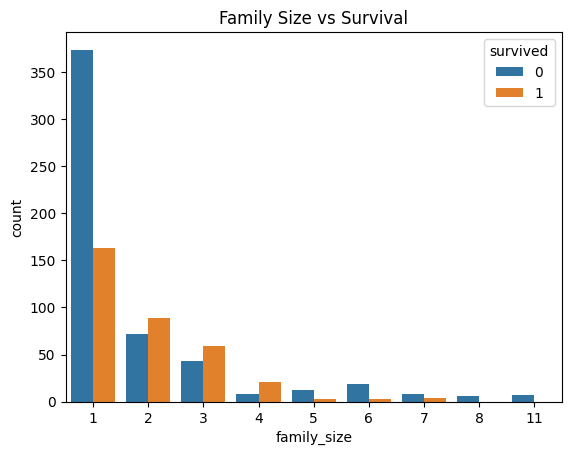

In [35]:
sns.countplot(data=df,x='family_size',hue="survived")
plt.title("Family Size vs Survival")
plt.show()

#### Demonstrates that passengers with small families had higher survival chances.

# 🔟 Final Dataset Preview

In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,col,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,True,1


# 1️⃣1️⃣ Key Insights

- Females had higher survival probability  
- First-class passengers survived more  
- Younger age groups had better survival  
- Higher fares were linked with higher survival  
- Small families survived more than solo travelers


#### Summarizes insights that can guide predictive modeling.

#  1️⃣2️⃣ Conclusion

This EDA transformed raw Titanic data into an analysis-ready dataset and uncovered critical survival patterns useful for machine learning models.


# 1️⃣3️⃣ Next Steps

- Train Logistic Regression and Random Forest models  
- Evaluate performance using accuracy and ROC-AUC  
- Extend project into a full ML pipeline


Outlines how this EDA can be extended into an end-to-end data science project.